In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
BASELINE = "TSGreedy"
PROBS = [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02]

In [3]:
T = pow(10, 3)
PERIOD = 50
N = 10
FOLDER = "epsilon_results"
REPEAT = 936
record_time = np.zeros(int(T/PERIOD))
for t in range(1, T+1):
    if t % PERIOD == 0:
        record_time[int(t/PERIOD)-1] = t
NAME_IN_PLOT = lambda name: f'ε-TS ε={name}'

In [4]:
def load_avg(BASELINE, N, DISTRIBUTION, PROB, T, repeat):
    data = np.zeros((repeat, int(T/PERIOD)))
    for i in range(repeat):
        file = "{}-{}-{}-{}-{}-{}.npy".format(BASELINE, N, DISTRIBUTION, T, round(PROB, 2), i)
        data_t = np.load(os.path.join(f'./{FOLDER}', file))
        data[i] = data_t
    return data

# plot

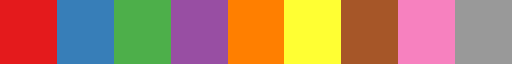

In [29]:
palette = plt.get_cmap('Set1')
palette

In [30]:
palette = plt.get_cmap('Set1')
colormap = {
    "ε-TS ε=1.0": palette(5),
    "ε-TS ε=0.8": palette(7),
    "ε-TS ε=0.5": palette(2),
    "ε-TS ε=0.3": palette(3),
    "ε-TS ε=0.2": palette(4),
    "ε-TS ε=0.1": palette(0),
    "ε-TS ε=0.05": palette(6),
    "ε-TS ε=0.02": palette(1),
}
linestyle = "solid"

In [31]:
# DISTRIBUTIONS = ["Gaussian", "Bernoulli", "Poisson", "Gamma"]
DISTRIBUTION = "Gamma"

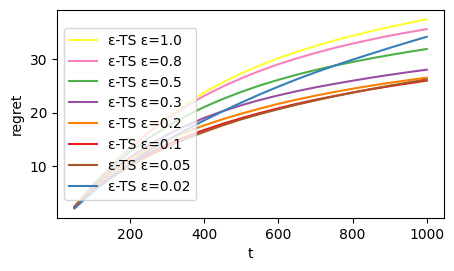

In [32]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
for PROB in PROBS:
    data = load_avg(BASELINE, N, DISTRIBUTION, PROB, T, REPEAT)
    means = data.mean(axis=0)
    ax.plot(record_time, means, label="{}".format(NAME_IN_PLOT(PROB)), color=colormap[f'ε-TS ε={PROB}'], linestyle=linestyle)
    # percentile_5 = np.percentile(data, 5, axis=0)
    # percentile_95 = np.percentile(data, 95, axis=0)
    # ax.fill_between(record_time, percentile_5, percentile_95, color=colormap[BASELINE], alpha=0.2)

ax.set_xlabel('t')  # Add an x-label to the axes.
ax.set_ylabel('regret')  # Add a y-label to the axes.
# ax.set_title(f'N={N} {DISTRIBUTION}')  # Add a title to the axes.
ax.legend(loc="center left",ncol=1, bbox_to_anchor=(0, 0.5), bbox_transform=ax.transAxes)  # Add a legend.
plt.savefig("epsilon_plot_results/epsilon_{}_{}.pdf".format(N, DISTRIBUTION),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    )

# Table

In [5]:
import pandas as pd

In [6]:
cols = ["baseline","distribution","200","400", "800", "1000"]
DISTRIBUTIONS = ["Gaussian", "Bernoulli", "Poisson", "Gamma"]
df = pd.DataFrame({}, columns=cols)
pick = [3,7,11,15]

In [7]:
for DISTRIBUTION in DISTRIBUTIONS:
    for PROB in PROBS:
        data = load_avg(BASELINE, N, DISTRIBUTION, PROB, T, REPEAT)
        data = data[:, pick]
        means = data.mean(axis=0)
        percentile_5 = np.percentile(data, 5, axis=0)
        percentile_95 = np.percentile(data, 95, axis=0)
        data_t = np.array([f'ε={PROB}', DISTRIBUTION])
        for i, (m, p5,p95) in enumerate(zip(means, percentile_5, percentile_95)):
            data_t = np.concatenate((data_t, np.array([f'{m:.1f}({p5:.1f} {p95:.1f})'])), axis=0)
        df.loc[len(df.index)] = data_t

In [8]:
df_tmp = df[df.distribution=="Gaussian"]
df_tmp = df_tmp.drop(columns=["distribution"])
print(df_tmp.to_markdown(index=False))

| baseline   | 200             | 400             | 800             | 1000            |
|:-----------|:----------------|:----------------|:----------------|:----------------|
| ε=1.0      | 16.5(12.9 18.8) | 33.4(25.3 38.3) | 49.8(36.9 58.1) | 65.7(47.9 77.7) |
| ε=0.8      | 16.4(12.0 18.8) | 33.0(23.7 38.4) | 49.1(34.9 58.2) | 64.8(44.2 77.8) |
| ε=0.5      | 16.4(11.3 18.8) | 32.7(21.9 38.6) | 48.2(30.5 58.3) | 63.0(38.7 77.9) |
| ε=0.3      | 16.2(9.9 18.9)  | 32.3(18.8 38.6) | 47.6(26.5 58.3) | 62.1(33.4 78.1) |
| ε=0.2      | 16.2(8.8 18.9)  | 32.2(15.7 38.8) | 47.1(21.4 58.7) | 61.3(27.5 78.5) |
| ε=0.1      | 16.0(6.4 19.0)  | 31.5(10.9 38.9) | 46.0(15.6 58.8) | 59.8(19.6 78.8) |
| ε=0.05     | 15.9(4.6 19.0)  | 31.6(7.6 39.0)  | 46.2(11.5 58.9) | 59.9(14.0 78.9) |
| ε=0.02     | 16.0(3.2 19.0)  | 32.0(4.8 39.0)  | 47.5(7.4 59.0)  | 62.2(9.1 79.0)  |


In [9]:
df_tmp = df[df.distribution=="Bernoulli"]
df_tmp = df_tmp.drop(columns=["distribution"])
print(df_tmp.to_markdown(index=False))

| baseline   | 200             | 400             | 800             | 1000            |
|:-----------|:----------------|:----------------|:----------------|:----------------|
| ε=1.0      | 15.7(12.2 18.2) | 30.1(21.5 37.2) | 42.7(28.9 55.8) | 53.5(35.4 73.1) |
| ε=0.8      | 15.5(11.5 18.2) | 29.4(20.4 37.2) | 41.3(27.0 55.7) | 51.3(31.6 73.8) |
| ε=0.5      | 15.2(10.3 18.3) | 28.5(18.1 37.6) | 39.4(23.9 56.4) | 48.3(28.4 74.4) |
| ε=0.3      | 14.9(8.5 18.4)  | 27.1(14.6 37.9) | 36.8(19.4 57.3) | 44.7(23.1 76.3) |
| ε=0.2      | 14.4(7.4 18.5)  | 26.0(12.5 38.0) | 35.1(16.7 57.2) | 42.3(20.2 76.5) |
| ε=0.1      | 13.8(5.3 18.7)  | 24.9(8.9 38.4)  | 33.5(11.4 58.1) | 40.3(14.0 77.8) |
| ε=0.05     | 13.2(3.3 18.8)  | 23.6(5.8 38.6)  | 32.0(8.1 58.4)  | 39.0(10.0 78.2) |
| ε=0.02     | 12.8(1.7 19.0)  | 23.6(3.2 38.9)  | 32.4(4.3 58.7)  | 40.2(5.4 78.6)  |


In [11]:
df_tmp = df[df.distribution=="Poisson"]
df_tmp = df_tmp.drop(columns=["distribution"])
print(df_tmp.to_markdown(index=False))

| baseline   | 200             | 400             | 800             | 1000            |
|:-----------|:----------------|:----------------|:----------------|:----------------|
| ε=1.0      | 16.4(14.2 17.9) | 32.4(26.7 36.6) | 47.1(37.4 55.3) | 60.4(46.1 73.9) |
| ε=0.8      | 16.3(14.2 17.8) | 32.1(26.4 36.6) | 46.3(35.9 54.6) | 59.1(43.2 72.9) |
| ε=0.5      | 16.2(13.4 17.9) | 31.5(23.9 36.7) | 45.0(32.0 55.3) | 56.8(39.2 73.8) |
| ε=0.3      | 15.9(12.6 18.0) | 30.2(21.4 37.0) | 42.5(28.4 55.8) | 53.0(34.5 74.7) |
| ε=0.2      | 15.6(11.1 18.1) | 29.2(19.2 37.2) | 40.4(25.1 56.2) | 49.5(29.8 75.2) |
| ε=0.1      | 15.2(9.4 18.3)  | 28.1(15.5 37.7) | 38.5(20.3 57.1) | 47.2(24.2 76.5) |
| ε=0.05     | 14.7(7.5 18.5)  | 26.8(12.0 38.0) | 36.6(15.1 57.6) | 44.5(17.7 77.2) |
| ε=0.02     | 14.3(6.3 18.6)  | 25.8(8.6 38.4)  | 35.3(10.7 58.2) | 43.2(12.4 78.0) |


In [12]:
df_tmp = df[df.distribution=="Gamma"]
df_tmp = df_tmp.drop(columns=["distribution"])
print(df_tmp.to_markdown(index=False))

| baseline   | 200            | 400             | 800             | 1000            |
|:-----------|:---------------|:----------------|:----------------|:----------------|
| ε=1.0      | 13.6(9.9 17.0) | 23.8(15.6 34.6) | 30.2(19.2 46.6) | 34.4(21.9 53.2) |
| ε=0.8      | 13.4(9.7 16.9) | 23.2(15.6 33.7) | 29.0(19.2 45.7) | 32.9(21.7 50.3) |
| ε=0.5      | 12.7(8.2 17.1) | 21.1(13.0 34.5) | 26.1(16.2 46.1) | 29.5(18.6 49.2) |
| ε=0.3      | 11.7(6.8 17.3) | 19.0(10.6 35.8) | 23.2(13.4 47.1) | 26.0(15.3 49.3) |
| ε=0.2      | 11.2(5.8 17.4) | 17.7(9.2 36.4)  | 21.7(11.4 54.7) | 24.5(13.1 60.0) |
| ε=0.1      | 10.5(4.3 17.7) | 16.8(7.1 37.2)  | 20.8(8.9 56.4)  | 23.8(10.3 75.6) |
| ε=0.05     | 10.1(2.8 17.8) | 16.4(4.8 37.5)  | 20.7(6.2 57.2)  | 23.8(7.2 76.8)  |
| ε=0.02     | 10.6(1.6 18.0) | 18.6(2.7 37.9)  | 24.9(3.5 57.8)  | 29.9(4.3 77.7)  |
